# Trabalho Final - Análise de Dados com Python

### Enunciado

A partir dos dados housing.csv, realize toda análise exploratória necessária e prepare os dados para algoritmos de machine learning usando a Scikit-Learn. Treine um modelo de regressão linear que prediga a variável meta (median_house_value) e cujo valor de RMSE seja menor ou igual a 69000. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# leitura dos dados
housing = pd.read_csv('bases/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Todos os atributos são do tipo float, com exceção de ocean_proximity que é uma variável categórica. Temos valores nulos apenas em total_bedrooms.<br>
Os possíveis valores para ocean_proximity são esses:

In [4]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Resumo dos atributos numéricos

In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Resumo do atributo categórico

In [6]:
housing.describe(include=['O'])

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

Visualizando o histograma das variáveis contínuas

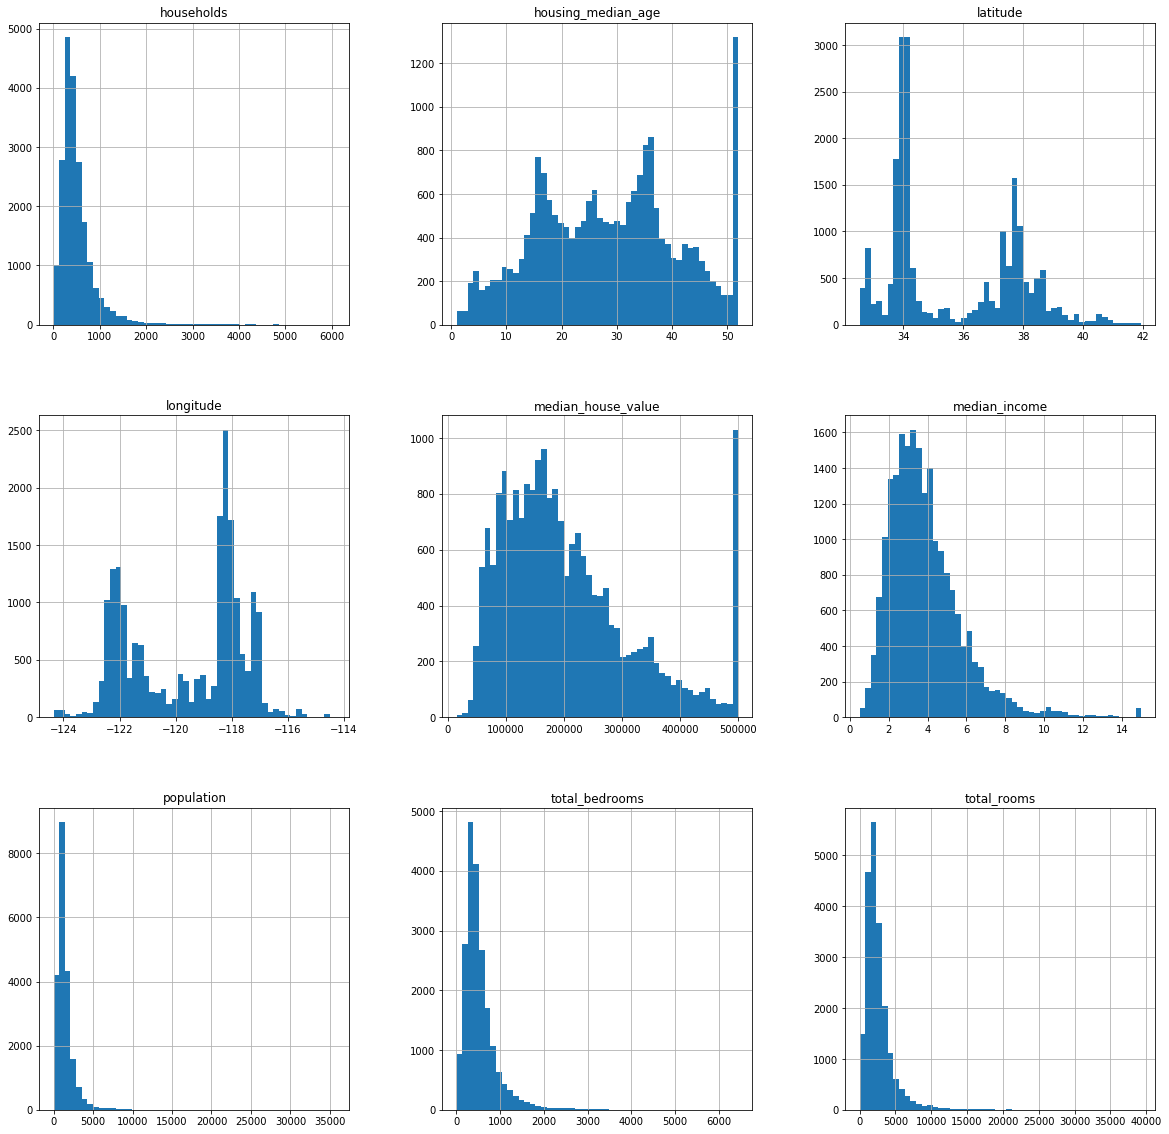

In [7]:
housing.hist(bins=50,figsize=(20,20))
plt.show()

Algumas variáveis possuem uma distribuição assimétrica, com cauda maior a direita.

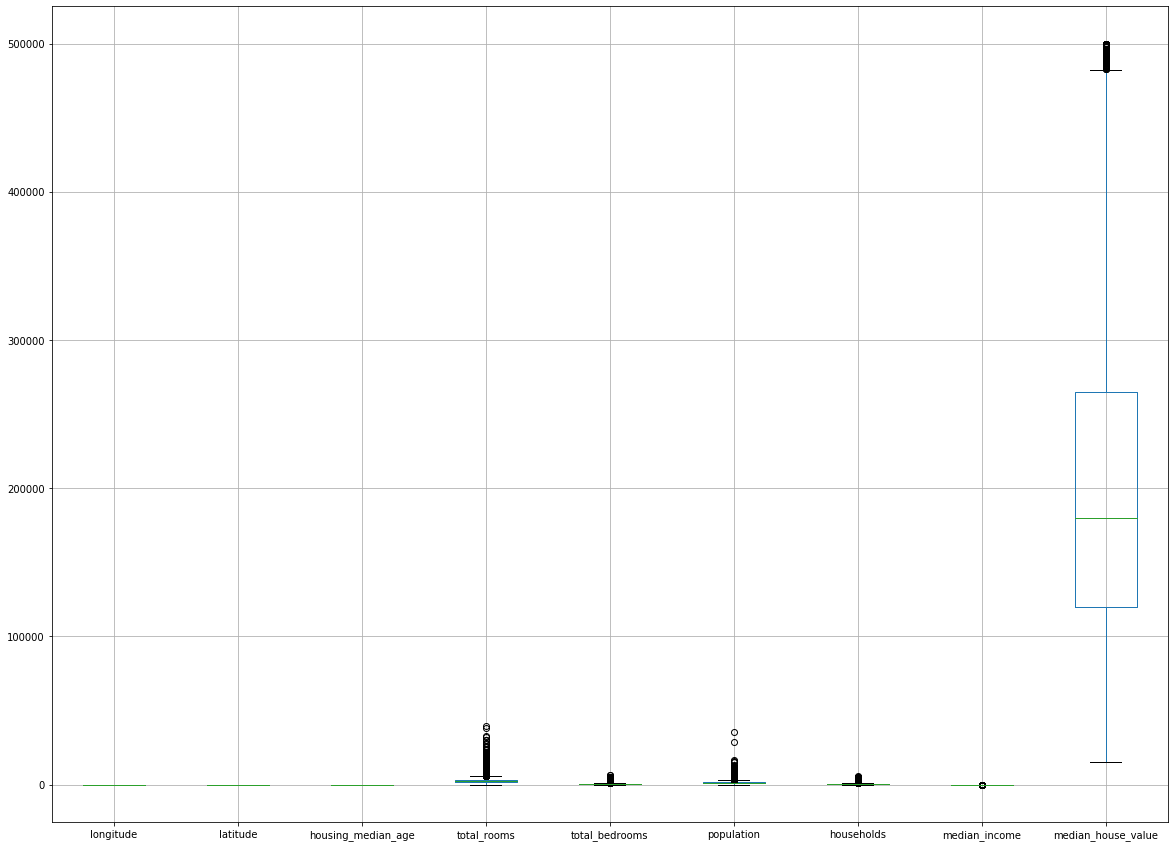

In [8]:
housing.boxplot(figsize=(20,15))
plt.show()

### Visualizando os dados

In [9]:
exploratory_data = housing.copy() #Copiando os dados para não comprometer o dataset original

Temos variáveis geográficas(latitude e longitude), então podemos visualizar as casas em um mapa. Também podemos visualizar a classificação quanto à proximidade do oceano.


In [10]:
import plotly.express as px
#import plotly.graph_objects as go


fig = px.scatter_geo(exploratory_data, lat='latitude', lon='longitude',
                     locationmode='USA-states',
                     color = 'ocean_proximity',
                     scope = 'usa',
                     projection= 'albers usa',
                     height=600,
                     width=900,
                     title='Distribuição geográfica das casas - proximidade do oceano'
                     )
#fig.update_geos(fitbounds="locations") #Para ver apenas a Califórnia


fig.show()

Podemos confirmar que só há casas na Califórnia, sem outliers como mostrou o boxplot.<br>
Através de um mapa também podemos visualizar facilmente a influência da localização no preço do imóvel.

In [11]:
#Está muito lento para renderizar 
#fig = px.scatter_geo(exploratory_data, lat='latitude', lon='longitude',
#                      locationmode='USA-states',
#                      size = 'population',
#                      color = 'median_house_value',
#                      scope = 'usa',
#                      projection= 'albers usa',
#                      height=600,
#                      width=900,
#                      title='Distribuição geográfica das casas'
#                      )
# fig.update_geos(fitbounds="locations",
#                lataxis_range=[30,45], lonaxis_range=[-130, -100])

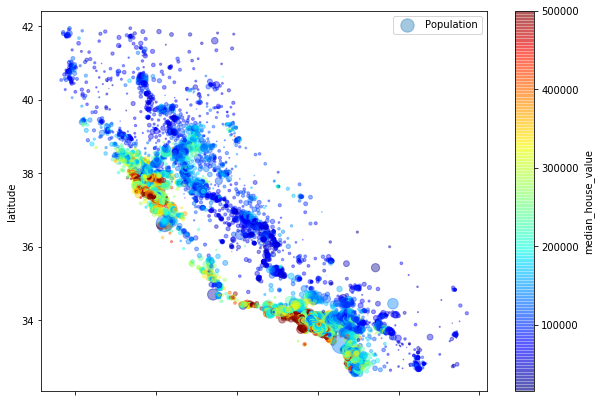

In [12]:
exploratory_data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=exploratory_data['population']/100, label="Population",
                       c="median_house_value",cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.show()

Dessa forma, podemos ver que os preços das casas são maiores nas regiões da baía de São Francisco e de Los Angeles. Então podemos dizer que o preço da casa está relacionado com a localização, proximidade do oceano e desnsidade da população.

Analisando a correlação das variáveis com o atributo meta.

In [13]:
corr_matrix = exploratory_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Podemos ver mais a fundo as correlações de algumas variáveis através de uma scatter_matrix.

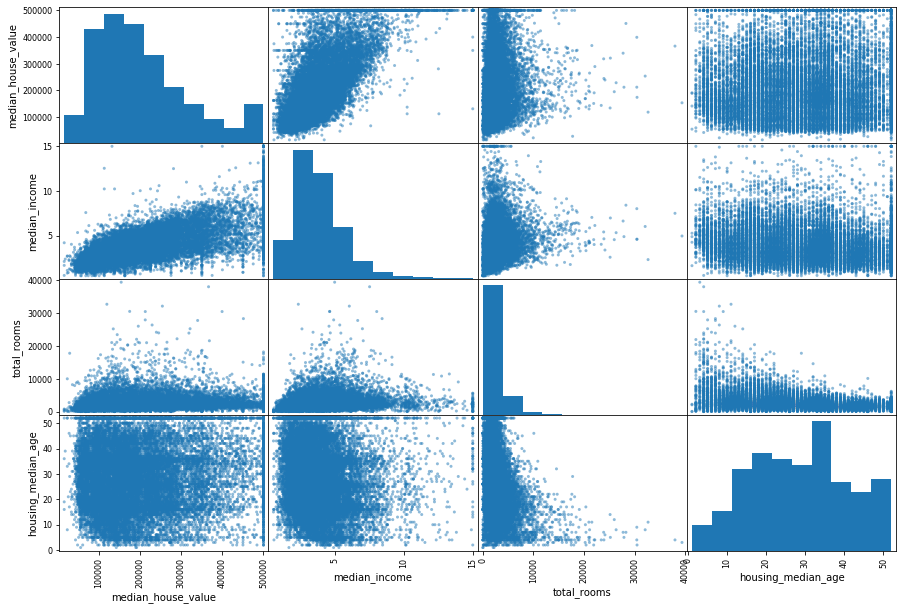

In [14]:
from pandas.plotting import scatter_matrix
attr = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(exploratory_data[attr], figsize = (15,10))

plt.show()

Vemos claramente uma correlação positiva entre *median_income* e *median_house_value*. Ou seja, quanto maior a renda dos moradores, maior o valor das casas.

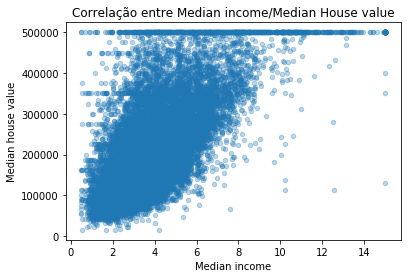

In [15]:
exploratory_data.plot.scatter(x = 'median_income', y = 'median_house_value', alpha=0.3)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Correlação entre Median income/Median House value')

plt.show()

In [16]:
px.imshow(corr_matrix)

Através do heatmap podemos ver facilmente a correlação de todas as variáveis. As variáveis *total_rooms*, *total_bedrooms*, *population* e *households* tem uma forte correlação positiva entre elas. Então seria interessante criar novas variáveis explorando essas relações. Então serão criadas as variáveis *rooms_per_household*, que indicará a quantidade de cômodos por moradores, *bedrooms_per_room*, a quantidade de quartos pelo total de cômodos da casa, e population_per_household, que é a relação da população da região pelo número de moradores. 

In [17]:
exploratory_data["rooms_per_household"] = exploratory_data["total_rooms"]/exploratory_data["households"]#quantidade de cômodos por moradores
exploratory_data["bedrooms_per_room"] = exploratory_data["total_bedrooms"]/exploratory_data["total_rooms"]#quantidade de quartos por cômodos
exploratory_data["population_per_household"]=exploratory_data["population"]/exploratory_data["households"]#população da região por moradores

In [18]:
px.imshow(exploratory_data.corr())

A nova variável *rooms_per_household* é mais informativa que a *total_rooms* existente.

## Dividindo em conjunto de teste e treino

Como vimos anteriormente, a variável target *median_house_value* tem uma correlação com *median_income*. Por isso, irei usar uma amostragem estratificada para que tenhamos amostras de todos os grupos de renda.

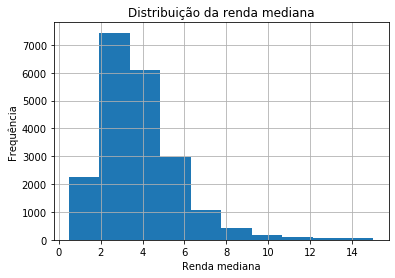

In [19]:
housing.median_income.hist()
plt.title("Distribuição da renda mediana")
plt.xlabel("Renda mediana")
plt.ylabel("Frequência")
plt.show()

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

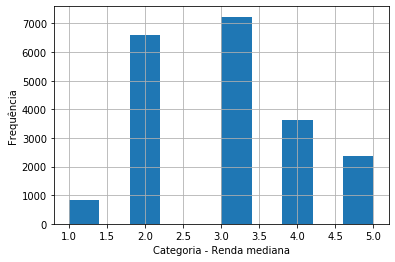

In [21]:
housing.income_cat.hist()
plt.xlabel("Categoria - Renda mediana")
plt.ylabel("Frequência")
plt.show()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
print(strat_train_set.shape)
print(strat_test_set.shape)
print(housing.shape)

(16512, 11)
(4128, 11)
(20640, 11)


Retirando a feature *income_cat* criada para estratificação.

In [24]:
for i in (strat_train_set, strat_test_set, housing):
    i.drop(["income_cat"],axis=1,inplace=True)

In [25]:
print(strat_train_set.shape)
print(strat_test_set.shape)
print(housing.shape)

(16512, 10)
(4128, 10)
(20640, 10)


O dataset foi dividido de forma que 80% dos dados estão no conjunto de treino e 20%, no conjunto de teste.

## Preparando os dados

In [26]:
features = strat_train_set.drop('median_house_value', axis=1)   #Demais variáveis
labels = strat_train_set['median_house_value'].copy()           #Variável target

### Limpeza dos dados

In [27]:
print(features.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64


Temos valores faltantes em *total_bedrooms* e na variável derivada *bedrooms_per_room*. Irei substituir os valores faltantes pela mediana da feature.

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
features_num = features.drop(['ocean_proximity'],axis=1) #Retirando atributo categórico
imputer.fit(features_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [29]:
imputer.statistics_     #Mediana de cada feature

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [30]:
X = imputer.transform(features_num) #Aplicar o inputer para transformar o dataset, retirando os valores faltantes
features_transformed = pd.DataFrame(X, columns=features_num.columns) #Transformar NumPy Array em Pandas DataFrame

Conferindo se ainda existem valores faltantes.

In [31]:
print(features_transformed.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


### Atributos categóricos

Precisamos transformar os valores categóricos, textuais, em numéricos para que o modelo consiga entender a variável.

In [32]:
from sklearn.preprocessing import OneHotEncoder
features_cat = features[['ocean_proximity']]
cat_encoder = OneHotEncoder()
features_cat_1hot = cat_encoder.fit_transform(features_cat)

In [33]:
features_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Pipeline

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

# Indexes das colunas, será usado em um numpy.Array
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X): #X é um numpy.Array
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [35]:
#Instanciando o objeto
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [36]:
#Conferindo se foram adicionadas as colunas
housing_extra_feat = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_feat.head()

longitude latitude housing_median_age total_rooms total_bedrooms population  \
0   -122.23    37.88                 41         880            129        322   
1   -122.22    37.86                 21        7099           1106       2401   
2   -122.24    37.85                 52        1467            190        496   
3   -122.25    37.85                 52        1274            235        558   
4   -122.25    37.85                 52        1627            280        565   

  households median_income median_house_value ocean_proximity  \
0        126        8.3252             452600        NEAR BAY   
1       1138        8.3014             358500        NEAR BAY   
2        177        7.2574             352100        NEAR BAY   
3        219        5.6431             341300        NEAR BAY   
4        259        3.8462             342200        NEAR BAY   

  rooms_per_household population_per_household  
0             6.98413                  2.55556  
1             6.23814                  2.10984  
2             8.28814                  2.80226  
3             5.81735                  2.54795  
4             6.28185                  2.18147

In [37]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler # MinMaxScaler
from sklearn.compose import ColumnTransformer

num_attribs = list(features_num)
cat_attribs = ['ocean_proximity']
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])


In [41]:
features_prepared = full_pipeline.fit_transform(features) #retorna um numpy.array

Utilizando o pipeline criado acima, tratamos o dataset quanto as variáveis numéricas, inserindo valores faltantes, criando as três novas variáveis vistas anteriormente, e normalizando os valores. Quanto a variável categórica, transformamos seus possíveis valores em numérico.

In [43]:
#Conferindo o dataset com os dados preparados
housing_prepared = pd.DataFrame(
    features_prepared,
    columns=num_attribs+["rooms_per_household", "population_per_household", 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
    index=features.index)
housing_prepared.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606  -1.156043  0.771950            0.743331    -0.493234       -0.445438   
18632  -1.176025  0.659695           -1.165317    -0.908967       -1.036928   
14650   1.186849 -1.342183            0.186642    -0.313660       -0.153345   
3230   -0.017068  0.313576           -0.290520    -0.362762       -0.396756   
3555    0.492474 -0.659299           -0.926736     1.856193        2.412211   

       population  households  median_income  rooms_per_household  \
17606   -0.636211   -0.420698      -0.614937            -0.312055   
18632   -0.998331   -1.022227       1.336459             0.217683   
14650   -0.433639   -0.093318      -0.532046            -0.465315   
3230     0.036041   -0.383436      -1.045566            -0.079661   
3555     2.724154    2.570975      -0.441437            -0.357834   

       population_per_household  bedrooms_per_room  <1H OCEAN  INLAND  \
17606                 -0.086499           0.155318        1.0     0.0   
18632                 -0.033534          -0.836289        1.0     0.0   
14650                 -0.092405           0.422200        0.0     0.0   
3230                   0.089736          -0.196453        0.0     1.0   
3555                  -0.004194           0.269928        1.0     0.0   

       NEAR OCEAN  NEAR BAY  ISLAND  
17606         0.0       0.0     0.0  
18632         0.0       0.0     0.0  
14650         0.0       0.0     1.0  
3230          0.0       0.0     0.0  
3555          0.0       0.0     0.0

## Regressão Linear

Treinando a regressão linear com os dados do conjunto de treino, já preparados através do Pipeline

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


lin_reg.fit(housing_prepared, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predição utilizando o modelo treinado, com o mesmo conjunto de treinamento

In [46]:
training_predictions = lin_reg.predict(housing_prepared)

In [48]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


Avaliando o modelo com o conjunto de teste

In [49]:
X_test= strat_test_set.drop("median_house_value",axis=1)
y_test= strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [51]:
test_predictions= lin_reg.predict(X_test_prepared)

In [52]:
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

66911.98070857546


Temos um RMSE de **66911.98070857546** para o conjunto de validação.